# C9 Data Science Capstone Project
## Week 3 Graded Assignment
### Part 1
### 1.1 Import the necessary libraries

In [1]:
!conda update pandas # Update pandas to resolve environment mismatch
!conda install beautifulsoup4 --yes
import numpy as np
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim  # for converting an address into latitude and longitude values

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /home/jupyterlab/conda/envs/python
  package name: pandas


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.3       |     pyha847dfd_0          86 KB
    ca-certificates-2021.4.13  |       h06a4308_1         114 KB
    certifi-2020.12.5          |   py36h06a4308_0         140 KB
    openssl-1.1.1k             |       h27cfd23_0         2.5 MB
    soupsieve-2.2.1            |     pyhd3eb1b0_0          32 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     pkgs/main/noarch::beautifulsoup4-4.9.3-pyha8

### 1.2. Method for Downloading the City Information

In [2]:
def download_city_info(city_url):
    response = requests.get(city_url)
    assert response.status_code == 200  #HTTP 200 OK success status response code indicates that the request has succeeded. 
    return response.text

### 1.3. Method for Converting a City's Data from HTML into a DataFrame

In [3]:
def city2df(city_url):

    html_city = download_city_info(city_url)

    soup = BeautifulSoup(html_city, 'html.parser')

    city_table = []
    parser=soup.find('table')
             
    for td in parser.find_all('td'):
        cell = {}
        if td.span.text=='Not assigned': # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
            pass
        else:
            cell['Postal Code'] = td.select("p > b")[0].string
            cell['Borough'] = (td.span.text).split('(')[0] #td.select("p a:nth-of-type(1)")[0].get('title')
            cell['Neighborhood'] = (((((td.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
            city_table.append(cell)
    
    df=pd.DataFrame(city_table)
        
    return df

### 1.4. Run the city2df method for acquiring the Toronto's data and placing it into a DataFrame

In [4]:
city_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' #M for Toronto

df = city2df(city_url)

# Cleanse the data:
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                                 'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                                 'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                                 'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


### Part 2 Get the latitude and the longitude coordinates of each neighborhood and merge these coordinates with the dataframe df. 

In [5]:
url_geo= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'

dfGeo = pd.read_csv(url_geo)

# Merge df (dataframe with postal codes, boroughs and neighborhoods) with dfGeo having the coordinates on Postal Code column
neighborhoods_df = pd.merge(df, dfGeo, on = 'Postal Code')
neighborhoods_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [6]:
# Alternative solution for using geopy library to get the latitude and longitude values of Toronto.
# Note: This method does not give as accurate coordinates as the coordinates in the csv file.
# However this is a good exercise for making use of the API. 

# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer,
# geolocator = Nominatim(user_agent="toronto_explorer") 

# lat_col = []
# lon_col = []

# for postal_code in df['Borough']:
        
#    location = geolocator.geocode(postal_code + ', Toronto')
#    latitude = location.latitude
#    longitude = location.longitude   
    
#    lat_col.append(latitude)
#    lon_col.append(longitude)

# Insert the Latitude and Longitude columns to the dataframe df
# df['Latitude']  = lat_col
# df['Longitude'] = lon_col

### Part 3: Explore and cluster the neighborhoods in Toronto. 
### 3.1 Getting to Know Toronto: Boroughs and Neighborhoods 

In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods_df['Borough'].unique()),
        neighborhoods_df.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [8]:
neighborhoods_df['Borough'].value_counts()

North York                24
Downtown Toronto          17
Scarborough               17
Etobicoke                 11
Central Toronto            9
West Toronto               6
York                       5
East Toronto               4
East York                  4
East Toronto Business      1
Mississauga                1
East York/East Toronto     1
Downtown Toronto Stn A     1
Etobicoke Northwest        1
Queen's Park               1
Name: Borough, dtype: int64

Use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer, as shown below.

In [9]:
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode('Toronto')
TO_latitude = location.latitude
TO_longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(TO_latitude, TO_longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


__Create a map of Toronto with neighborhoods superimposed on top.__

In [62]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[TO_latitude, TO_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_df['Latitude'], neighborhoods_df['Longitude'], neighborhoods_df['Borough'], neighborhoods_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

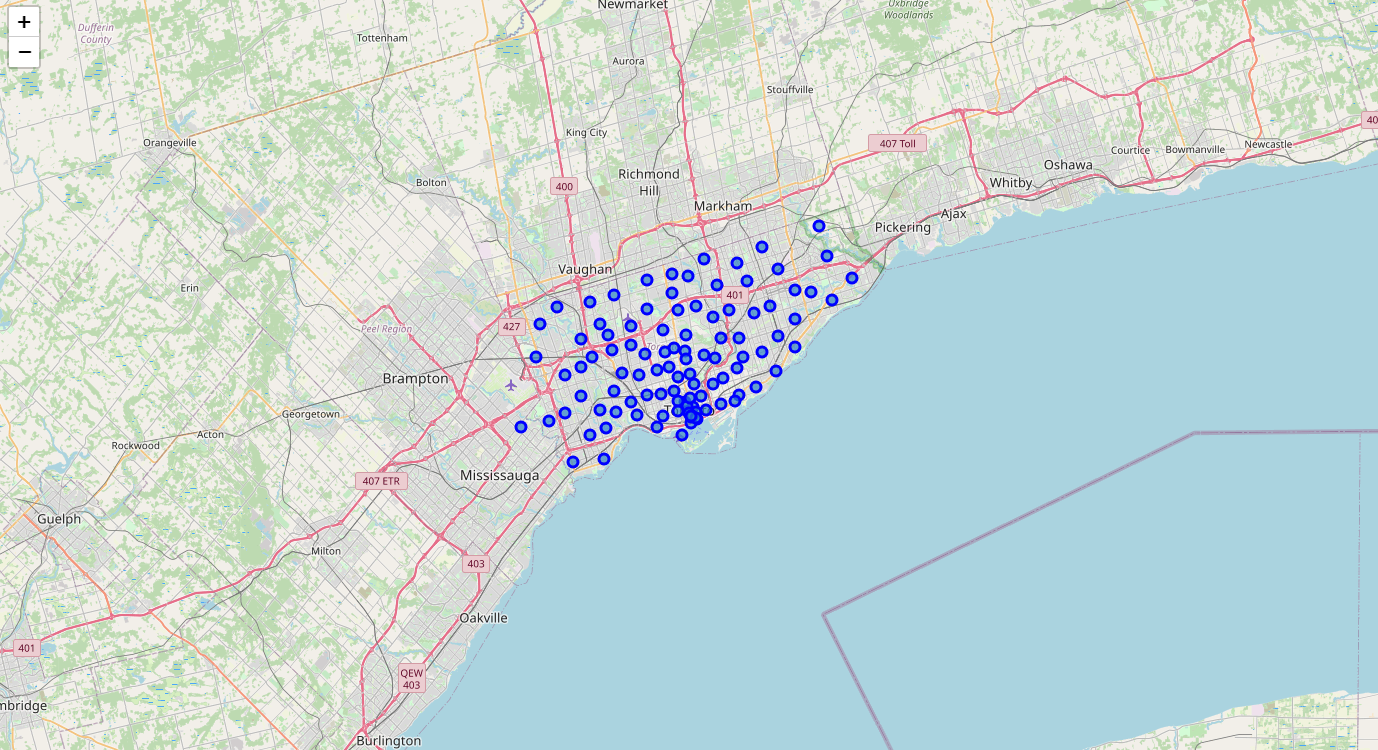

### 3.2 Going Deeper: Exploring Downtown Toronto
Let's simplify the above map and segment and cluster only the neighborhoods in Downtown Toronto. So let's slice the original dataframe and create a new dataframe of the Downtown Toronto data.

In [11]:
downtown_df = neighborhoods_df[neighborhoods_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
7,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
8,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576
9,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817


Let's get the geographical coordinates of North York.

In [12]:
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode('Downtown Toronto, Toronto')
DT_latitude = location.latitude
DT_longitude = location.longitude
print('The geograpical coordinates of North York are {}, {}.'.format(DT_latitude, DT_longitude))

The geograpical coordinates of North York are 43.6541737, -79.38081164513409.


Let's get a closer look on the neighborhoods of North York, just like we did for Toronto.

In [60]:
map_DT = folium.Map(location=[DT_latitude, DT_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(downtown_df['Latitude'], downtown_df['Longitude'], downtown_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_DT)  
    
map_DT

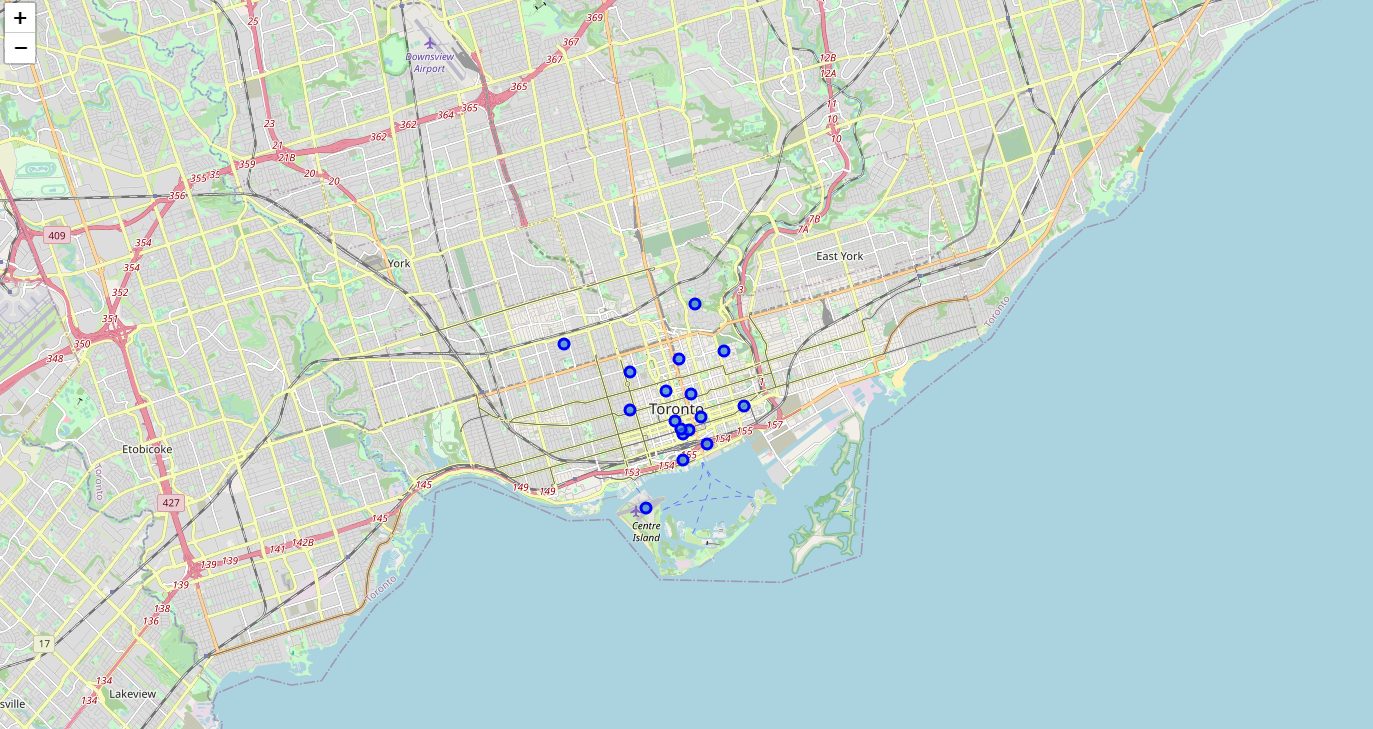

### 3.3 Making Use of Foursquare
Define Foursquare Credentials and Version

In [14]:
# @hidden_cell
CLIENT_ID = 'T4BXXZ22LKQB4Q1DZ3D1LGMX4UWEIKZJ1ZZRCRHAI2APWIB5' # your Foursquare ID
CLIENT_SECRET = 'NSLH0WUP1I4OAMAP5YBYKZOGWTJSPU0EHG4EQP11Y1JJJLF1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T4BXXZ22LKQB4Q1DZ3D1LGMX4UWEIKZJ1ZZRCRHAI2APWIB5
CLIENT_SECRET:NSLH0WUP1I4OAMAP5YBYKZOGWTJSPU0EHG4EQP11Y1JJJLF1


### 3.4 Explore the Neighborhoods in Downtown Toronto
Create a function to explore the venues for all the neighborhoods in Manhattan

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get the venues for all the neighborhoods in Downtown Toronto.

In [16]:
downtown_venues = getNearbyVenues(downtown_df['Neighborhood'], downtown_df['Latitude'], downtown_df['Longitude'])

In [17]:
print(downtown_venues.shape)
downtown_venues.head()

(1096, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Let's check how many venues were returned for each neighborhood.

In [18]:
(downtown_venues.groupby('Neighborhood').count()).loc[:, 'Venue Category']

Neighborhood
Berczy Park                                                                                                    59
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport     16
Central Bay Street                                                                                             66
Christie                                                                                                       16
Church and Wellesley                                                                                           73
Commerce Court, Victoria Hotel                                                                                100
First Canadian Place, Underground city                                                                        100
Garden District, Ryerson                                                                                      100
Harbourfront East, Union Station, Toronto Islands                          

The number of unique categories that can be curated from all the returned venues: 

In [19]:
print('There are {} unique categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 205 unique categories.


__We need to do a bit of a data cleansing: Upon some inspection it has been observed that there are some occurances of "Neighborhood" as a venue category. Therefore, we need to remove the rows (venues) which are credited as "neighborhood".__

In [20]:
downtown_venues = downtown_venues[downtown_venues['Venue Category'] != 'Neighborhood']
# Alternative way to drop the row where venue category is "neighborhood":
# downtown_venues.drop(downtown_venues.loc[downtown_venues['Venue Category']=='Neighborhood'].index, inplace = True)
print('There are {} unique categories.'.format(len(downtown_venues['Venue Category'].unique())))
print('There are {} venues.'.format(downtown_venues.shape[0]))

There are 204 unique categories.
There are 1094 venues.


### 3.5 Analyze Each Neighborhood

In [21]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# Find in which column of the dataframe is 'Neighborhood'
neigh_ind = list(downtown_onehot.columns).index('Neighborhood')

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[neigh_ind]] + list(downtown_onehot.columns[:neigh_ind]) + list(downtown_onehot.columns[neigh_ind+1:])
                                                            
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Let's check the new dataframe size:


In [22]:
downtown_onehot.shape

(1094, 205)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category. What this actually does is that, for each neighborhood, we divide the number of venues in each category to the total number of venues in that neighborhood. For example, there is 1 basketball stadium in Berczy Park out of 59 venues. Hence, the frequency of it in the table below is 1/59 = 0.016949.

In [23]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.016949,0.033898,0.000000,0.000000,0.000000,0.016949,0.016949,0.000000,0.033898,0.000000,0.016949,0.016949,0.0000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016949,0.0000,0.000000,0.033898,0.000000,0.000000,0.016949,0.050847,0.084746,0.000000,0.000000,0.00,0.00000,0.016949,0.000000,0.016949,0.000000,0.000000,0.016949,0.00000,0.000000,0.000000,0.016949,0.000000,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.016949,0.016949,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.016949,0.016949,0.016949,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.016949,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.016949,0.016949,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.016949,

In [24]:
downtown_grouped.shape

(17, 205)

### 3.6 Final Process Before Clustering
First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Farmers Market,Bakery,Restaurant,Cheese Shop,Pharmacy,Jazz Club
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport,Bar,Coffee Shop,Plane,Rental Car Location,Sculpture Garden,Boutique,Boat or Ferry
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Salad Place,Bubble Tea Shop,Burger Joint,Modern European Restaurant,Japanese Restaurant,Juice Bar
3,Christie,Grocery Store,Café,Park,Nightclub,Restaurant,Italian Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Yoga Studio,Men's Store,Hotel,Fast Food Restaurant,Gay Bar,Pub
5,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,Italian Restaurant,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Deli / Bodega
6,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,Restaurant,Gym,Japanese Restaurant,Salad Place,Seafood Restaurant,Deli / Bodega,Asian Restaurant
7,"Garden District, Ryerson",Coffee Shop,Clothing Store,Bubble Tea Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Hotel,Pizza Place,Bookstore
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Hotel,Café,Restaurant,Brewery,Sporting Goods Shop,Fried Chicken Joint,Scenic Lookout,Bakery
9,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Mexican Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Grocery Store,Bar,Park,Bakery,Arts & Crafts Store


### 3.7 Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [46]:
# set number of clusters
kclusters = 5

# Drop the column with neighborhood names as it cannot be used in clustering.
downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster that we created in Section 3.2 joining the top 10 venues for each neighborhood.

In [47]:
# add clustering labels as the very first column
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_df

# merge downtown_grouped with downtown_df to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged 

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Pub,Bakery,Park,Café,Breakfast Spot,Theater,Yoga Studio,Electronics Store,Performing Arts Venue
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Bubble Tea Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Hotel,Pizza Place,Bookstore
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Clothing Store,Cosmetics Shop,Cocktail Bar,Gastropub,Hotel,Gym,Department Store,Moroccan Restaurant
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Farmers Market,Bakery,Restaurant,Cheese Shop,Pharmacy,Jazz Club
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Salad Place,Bubble Tea Shop,Burger Joint,Modern European Restaurant,Japanese Restaurant,Juice Bar
5,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Grocery Store,Café,Park,Nightclub,Restaurant,Italian Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Clothing Store,Thai Restaurant,Deli / Bodega,Salad Place,Pizza Place,Hotel
7,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Hotel,Café,Restaurant,Brewery,Sporting Goods Shop,Fried Chicken Joint,Scenic Lookout,Bakery
8,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Coffee Shop,Hotel,Café,Restaurant,Japanese Restaurant,Salad Place,Seafood Restaurant,Italian Restaurant,Beer Bar,Breakfast Spot
9,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,0,Coffee Shop,Restaurant,Café,Hotel,Italian Restaurant,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Deli / Bodega


Finally, let's visualize the resulting clusters.

In [58]:
map_clusters = folium.Map(location=[DT_latitude, DT_longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

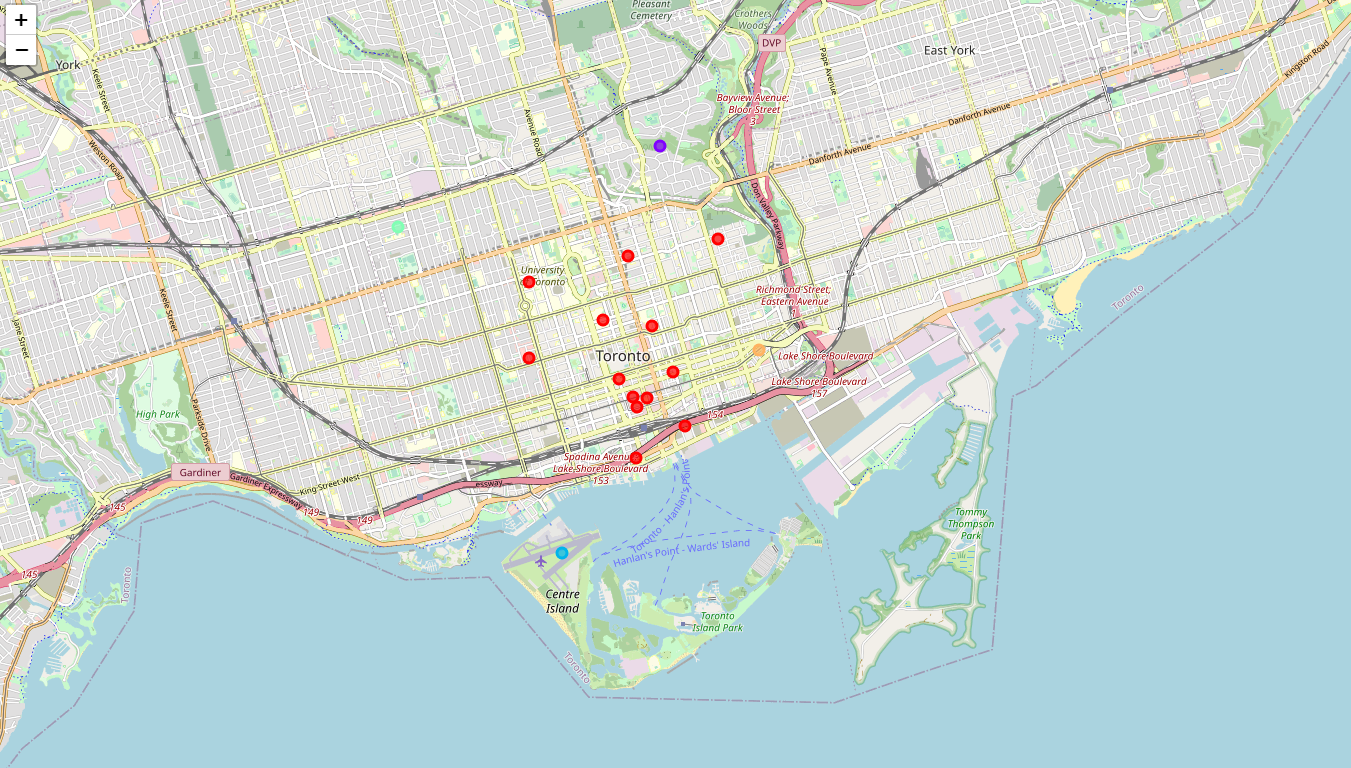